# Chapter 5: A Discerning Machine
Paolo Perrotta, Programming Machine Learning: From Coding to Deep Learning (2020)

## Where Linear Regression Fails

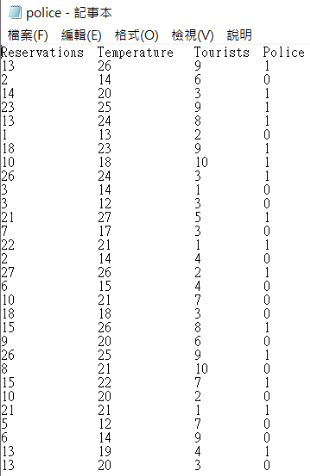

In [1]:
import numpy as np
x1, x2, x3, y = np.loadtxt("police.txt", skiprows=1, unpack=True)

In [2]:
print(x1.shape)
print(x1[0:5], x2[0:5], x3[0:5], y[0:5])

(30,)
[13.  2. 14. 23. 13.] [26. 14. 20. 25. 24.] [9. 6. 3. 9. 8.] [1. 0. 1. 1. 1.]


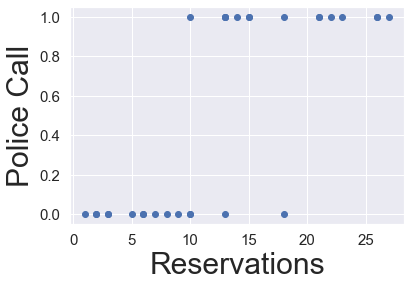

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(x1, y, "bo")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Reservations", fontsize=30)
plt.ylabel("Police Call", fontsize=30)

plt.show()

In [4]:
X = np.column_stack((np.ones(x1.size), x1, x2, x3))
print(X)
print(X.shape)

[[ 1. 13. 26.  9.]
 [ 1.  2. 14.  6.]
 [ 1. 14. 20.  3.]
 [ 1. 23. 25.  9.]
 [ 1. 13. 24.  8.]
 [ 1.  1. 13.  2.]
 [ 1. 18. 23.  9.]
 [ 1. 10. 18. 10.]
 [ 1. 26. 24.  3.]
 [ 1.  3. 14.  1.]
 [ 1.  3. 12.  3.]
 [ 1. 21. 27.  5.]
 [ 1.  7. 17.  3.]
 [ 1. 22. 21.  1.]
 [ 1.  2. 14.  4.]
 [ 1. 27. 26.  2.]
 [ 1.  6. 15.  4.]
 [ 1. 10. 21.  7.]
 [ 1. 18. 18.  3.]
 [ 1. 15. 26.  8.]
 [ 1.  9. 20.  6.]
 [ 1. 26. 25.  9.]
 [ 1.  8. 21. 10.]
 [ 1. 15. 22.  7.]
 [ 1. 10. 20.  2.]
 [ 1. 21. 21.  1.]
 [ 1.  5. 12.  7.]
 [ 1.  6. 14.  9.]
 [ 1. 13. 19.  4.]
 [ 1. 13. 20.  3.]]
(30, 4)


## Invasion of the Sigmoids

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def forward(X, w):
    weighted_sum = np.matmul(X, w)
    return sigmoid(weighted_sum)

In [7]:
# This is a test
w = np.random.rand(X.shape[1], 1)
print(w)
print(np.matmul(X, w))   # (30 x 4) x (4 x 1) = 30 x 1
sigmoid(np.matmul(X, w))

[[0.75141055]
 [0.57605225]
 [0.57965206]
 [0.97514808]]
[[32.0873761 ]
 [15.86953239]
 [23.3346275 ]
 [37.2682465 ]
 [29.95292389]
 [10.81323577]
 [33.22868114]
 [26.69715093]
 [32.56586271]
 [11.56984425]
 [12.36083628]
 [33.37485382]
 [17.56330558]
 [26.57240138]
 [13.91923624]
 [33.32607101]
 [16.80309729]
 [25.51066289]
 [24.47953236]
 [32.26433251]
 [23.3798105 ]
 [38.99640324]
 [27.28400263]
 [28.97057618]
 [20.05527044]
 [25.99634913]
 [17.41353308]
 [21.09918561]
 [23.15407127]
 [22.75857525]]


array([[1.        ],
       [0.99999987],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99997987],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999055],
       [0.99999572],
       [1.        ],
       [0.99999998],
       [1.        ],
       [0.9999991 ],
       [1.        ],
       [0.99999995],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999997],
       [1.        ],
       [1.        ],
       [1.        ]])

In [8]:
def classify(X, w):
    return np.round(forward(X, w))

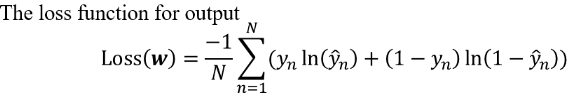

In [9]:
def loss(X, Y, w):
    y_hat = forward(X, w)                       # (30 x 4) x (4 x 1) = 30 x 1
    first_term = Y * np.log(y_hat)              # (30 x 1) * (30 x 1) = 30 x 1
    second_term = (1 - Y) * np.log(1 - y_hat)   # (30 x 1) * (30 x 1) = 30 x 1
    return -np.average(first_term + second_term)  # a scalar

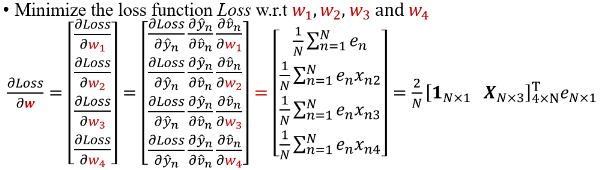

In [10]:
def gradient(X, Y, w):
    return np.matmul(X.T, (forward(X, w) - Y)) / X.shape[0]    # (4 x 30) x (30 x 1) = 4 x 1

## Classification in Action

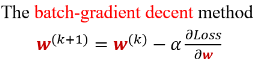

In [11]:
def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        if i % 100000 == 0:
            print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w


def test(X, Y, w):
    total_examples = X.shape[0]
    correct_results = np.sum(classify(X, w) == Y)
    success_percent = correct_results * 100 / total_examples
    print("\nSuccess: %d/%d (%.2f%%)" %
          (correct_results, total_examples, success_percent))


# Prepare data
x1, x2, x3, y = np.loadtxt("police.txt", skiprows=1, unpack=True)
X = np.column_stack((np.ones(x1.size), x1, x2, x3))
Y = y.reshape(-1, 1)
w = train(X, Y, iterations=1000000, lr=0.001)

# Test it
test(X, Y, w)

Iteration    0 => Loss: 0.69314718055994495316
Iteration 100000 => Loss: 0.29860310143239932046
Iteration 200000 => Loss: 0.26390196360818601873
Iteration 300000 => Loss: 0.24584056230212969485
Iteration 400000 => Loss: 0.23514864383232403355
Iteration 500000 => Loss: 0.22822359694871396929
Iteration 600000 => Loss: 0.22344354351231318634
Iteration 700000 => Loss: 0.21998671436340566654
Iteration 800000 => Loss: 0.21739707758873003107
Iteration 900000 => Loss: 0.21540304311841032558

Success: 27/30 (90.00%)


Iteration    0 => Loss: 0.69314718055994495316
Iteration 100000 => Loss: 0.29153771859650101650
Iteration 200000 => Loss: 0.29153769517762956331
Iteration 300000 => Loss: 0.29153769517758937324
Iteration 400000 => Loss: 0.29153769517758942875
Iteration 500000 => Loss: 0.29153769517758942875
Iteration 600000 => Loss: 0.29153769517758942875
Iteration 700000 => Loss: 0.29153769517758942875
Iteration 800000 => Loss: 0.29153769517758942875
Iteration 900000 => Loss: 0.29153769517758942875


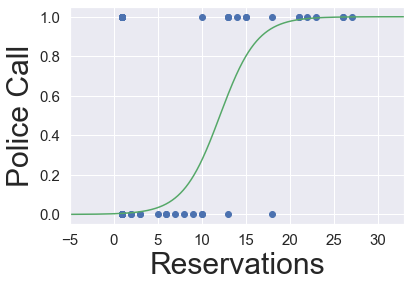

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X = np.column_stack((np.ones(x1.size), x1))
Y = y.reshape(-1, 1)
w = train(X, Y, iterations=1000000, lr=0.01)

plt.plot(X, Y, "bo")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Reservations", fontsize=30)
plt.ylabel("Police Call", fontsize=30)
MARGIN = 3
left_edge = X[:, 1].min() - MARGIN
right_edge = X[:, 1].max() + MARGIN
inputs = np.linspace(left_edge - MARGIN, right_edge + MARGIN, 2500)
x_values = np.column_stack((np.ones(inputs.size), inputs.reshape(-1, 1)))

# Uncomment one of the two lines below to plot the model with/without the
# rounding introduced by classify()
y_values = forward(x_values, w)   # no rounding
# y_values = classify(x_values, w)  # rounded

plt.axis([left_edge - MARGIN, right_edge + MARGIN, -0.05, 1.05])
plt.plot(x_values[:, 1], y_values, color="g")
plt.show()


Iteration    0 => Loss: 0.69314718055994495316
Iteration 100000 => Loss: 0.32895415840877550995
Iteration 200000 => Loss: 0.29572167693894541030
Iteration 300000 => Loss: 0.27825424077341481821
Iteration 400000 => Loss: 0.26791800796709691612
Iteration 500000 => Loss: 0.26126980173692510023
Iteration 600000 => Loss: 0.25673229395202351588
Iteration 700000 => Loss: 0.25349736886220847198
Iteration 800000 => Loss: 0.25111355463630269380
Iteration 900000 => Loss: 0.24931102987550629591


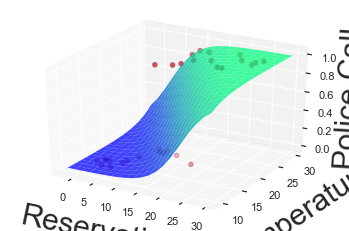

In [13]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

x1, x2, _, y = np.loadtxt("police.txt", skiprows=1, unpack=True)
X = np.column_stack((np.ones(x1.size), x1, x2))
Y = y.reshape(-1, 1)
w = train(X, Y, iterations=1000000, lr=0.001)

# Plot the axes
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
ax = plt.figure().gca(projection="3d")
ax.set_xlabel("Reservations", labelpad=15, fontsize=30)
ax.set_ylabel("Temperature", labelpad=15, fontsize=30)
ax.set_zlabel("Police Call", labelpad=5, fontsize=30)

# Plot the data points
ax.scatter(x1, x2, y, color='r')

# Plot the model
MARGIN = 3
MESH_SIZE = 20
x, y = np.meshgrid(np.linspace(x1.min() - MARGIN, x1.max() + MARGIN, MESH_SIZE),
                   np.linspace(x2.min() - MARGIN, x2.max() + MARGIN, MESH_SIZE))
z = np.array([forward(np.column_stack(([1], [i], [j])), w) for i, j in zip(np.ravel(x), np.ravel(y))])
z = z.reshape((MESH_SIZE, MESH_SIZE))
ax.plot_surface(x, y, z, alpha=0.75, cmap=cm.winter,
                linewidth=0, antialiased=True, color='black')

plt.show()
